In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

In [2]:
data = np.load('../datasets/final_edges.dump', allow_pickle= True)

In [3]:
smiles = []
for i in data:
    smiles.append(i[0])
    smiles.append(i[1])
    

In [4]:
smiles = np.array(list(set(smiles)))

In [5]:
import networkx as nx

In [6]:
from karateclub import DeepWalk

In [7]:
G = nx.Graph()

In [8]:
obj = []
for i in tqdm(data):
    if i[2] == '1':
        id1 = np.where
        obj.append((np.where(smiles == i[0])[0][0],np.where(smiles == i[1])[0][0]) )

  0%|          | 0/87153 [00:00<?, ?it/s]

In [9]:
G.add_edges_from(obj)

In [10]:
model = DeepWalk()
model.fit(G)
embedding = model.get_embedding()

In [11]:
Nodes = np.array(G.nodes())

In [12]:
from rdkit import Chem
import rdkit
from rdkit.Chem import AllChem

In [13]:
graph_embeds_data = []
fingerprint_data = []
for i in tqdm(data):
    graph_embeds_data.append([
                     np.concatenate((embedding[np.where(smiles == i[0])[0][0]], 
                                     embedding[np.where(smiles == i[1])[0][0]] )), i[2] ])
    
    mol1 = Chem.MolFromSmiles(i[0])
    mol2 = Chem.MolFromSmiles(i[1])
    fp1 = np.array(rdkit.Chem.RDKFingerprint(mol1, maxPath=7, fpSize=512), dtype=object)
    fp2 = np.array(rdkit.Chem.RDKFingerprint(mol2, maxPath=7, fpSize=512), dtype=object)
    fingerprint_data.append([
        np.concatenate(( fp1, fp2)), i[2]
    ])

  0%|          | 0/87153 [00:00<?, ?it/s]

In [21]:
fingerprint_data = np.array(fingerprint_data, dtype=object)
graph_embeds_data = np.array(graph_embeds_data)

In [33]:
len(fingerprint_data[0][0])

1024

In [25]:
final_data = []
for i in range(len(fingerprint_data)):
    final_data.append([np.concatenate((fingerprint_data[i][0], graph_embeds_data[i][0])), fingerprint_data[i][1]])

In [26]:
final_data = np.array(final_data)

/home2/kanakala.ganesh/miniconda3/envs/fast/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [27]:
X = []
y = []
for i in tqdm(final_data):
    X.append(i[0])
    y.append(i[1])

  0%|          | 0/87153 [00:00<?, ?it/s]

In [28]:
X = np.array(X)
y = np.array(y)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
X_train.shape

(69722, 1280)

In [31]:
y_train.shape

(69722,)

In [34]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

In [35]:
from sklearn import metrics

In [36]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11650
           1       0.88      0.80      0.84      5781

    accuracy                           0.90     17431
   macro avg       0.89      0.87      0.88     17431
weighted avg       0.90      0.90      0.89     17431



In [37]:
print("roc_auc_score: ", metrics.roc_auc_score(y_test, y_pred))


roc_auc_score:  0.8710804596677142


/home2/kanakala.ganesh/miniconda3/envs/fast/lib/python3.6/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [38]:
print("f1 score: ", metrics.f1_score(y_test, y_pred , pos_label='1'))

f1 score:  0.8355233348436791


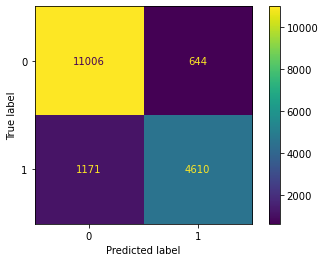

In [39]:
metrics.plot_confusion_matrix(reg_rf, X_test, y_test)